In [1]:
import networkx as nx

# Initialize a directed graph
G = nx.DiGraph()

# Add Producers
producers = ['P1', 'P2', 'P3', 'P4', 'P5']
G.add_nodes_from(producers, type='producer')

# Add Consumers
consumers = ['C1', 'C2', 'C3', 'C4', 'C5']
G.add_nodes_from(consumers, type='consumer')

# Add Topics
topics = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']
G.add_nodes_from(topics, type='topic')

# Add Brokers
brokers = ['B1', 'B2', 'B3']
G.add_nodes_from(brokers, type='broker')

# Define Producer to Topic relationships
producer_topic = {
    'P1': ['T1', 'T2'],
    'P2': ['T2', 'T3'],
    'P3': ['T3', 'T4'],
    'P4': ['T4', 'T5'],
    'P5': ['T5', 'T6', 'T7']
}

# Add edges from Producers to Topics
for producer, topics_list in producer_topic.items():
    for topic in topics_list:
        G.add_edge(producer, topic, relationship='publishes')

# Define Topic to Consumer relationships
topic_consumer = {
    'C1': ['T1', 'T3'],
    'C2': ['T2', 'T4'],
    'C3': ['T3', 'T5'],
    'C4': ['T5', 'T6'],
    'C5': ['T6', 'T7']
}

# Add edges from Topics to Consumers
for consumer, topics_list in topic_consumer.items():
    for topic in topics_list:
        G.add_edge(topic, consumer, relationship='subscribes')

# Define Broker to Topic relationships
broker_topic = {
    'B1': ['T1', 'T4', 'T7'],
    'B2': ['T2', 'T5'],
    'B3': ['T3', 'T6']
}

# Add edges between Brokers and Topics (since brokers host topics)
for broker, topics_list in broker_topic.items():
    for topic in topics_list:
        G.add_edge(broker, topic, relationship='hosts')


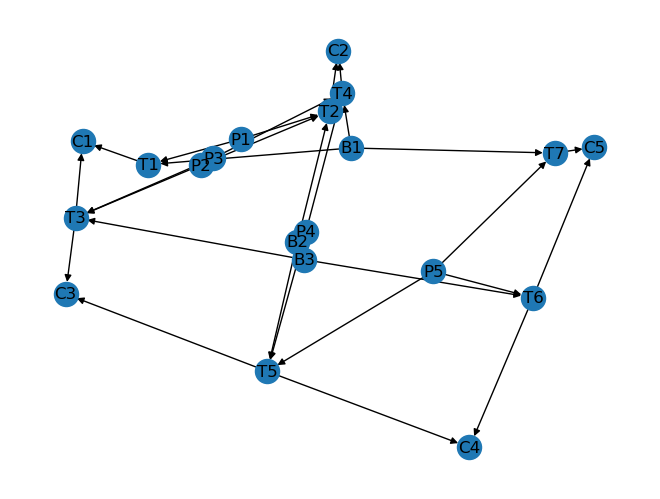

In [4]:
# Print the graph
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
plt.show()

In [3]:
nx.write_gexf(G, 'output/pubsub_graph.gexf')

In [5]:
# Calculate degrees for topics
topic_degrees = {}
for topic in topics:
    in_degree = G.in_degree(topic)
    out_degree = G.out_degree(topic)
    total_degree = in_degree + out_degree
    topic_degrees[topic] = {
        'in_degree': in_degree,
        'out_degree': out_degree,
        'total_degree': total_degree
    }

# Sort topics by total degree
sorted_topics = sorted(topic_degrees.items(), key=lambda x: x[1]['total_degree'], reverse=True)

print("Topics sorted by total degree:")
for topic, degrees in sorted_topics:
    print(f"Topic {topic}: In-Degree = {degrees['in_degree']}, Out-Degree = {degrees['out_degree']}, Total Degree = {degrees['total_degree']}")


Topics sorted by total degree:
Topic T3: In-Degree = 3, Out-Degree = 2, Total Degree = 5
Topic T5: In-Degree = 3, Out-Degree = 2, Total Degree = 5
Topic T2: In-Degree = 3, Out-Degree = 1, Total Degree = 4
Topic T4: In-Degree = 3, Out-Degree = 1, Total Degree = 4
Topic T6: In-Degree = 2, Out-Degree = 2, Total Degree = 4
Topic T1: In-Degree = 2, Out-Degree = 1, Total Degree = 3
Topic T7: In-Degree = 2, Out-Degree = 1, Total Degree = 3


In [6]:
# Calculate degrees for producers
producer_degrees = {producer: G.out_degree(producer) for producer in producers}

print("Producer degrees:")
for producer, degree in producer_degrees.items():
    print(f"Producer {producer}: Out-Degree = {degree}")


Producer degrees:
Producer P1: Out-Degree = 2
Producer P2: Out-Degree = 2
Producer P3: Out-Degree = 2
Producer P4: Out-Degree = 2
Producer P5: Out-Degree = 3


In [7]:
# Calculate degrees for consumers
consumer_degrees = {consumer: G.in_degree(consumer) for consumer in consumers}

print("Consumer degrees:")
for consumer, degree in consumer_degrees.items():
    print(f"Consumer {producer}: In-Degree = {degree}")


Consumer degrees:
Consumer P5: In-Degree = 2
Consumer P5: In-Degree = 2
Consumer P5: In-Degree = 2
Consumer P5: In-Degree = 2
Consumer P5: In-Degree = 2
